This notebook aims to explore relationships between human resources with suicide rate (https://www.kaggle.com/twinkle0705/mental-health-and-suicide-rates?select=Human+Resources.csv).

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style("darkgrid")
%matplotlib inline

In [19]:
# relationship with suicide rates is first explored
df_hr = pd.read_csv("Human Resources.csv")
df_suicide = pd.read_csv("Age-standardized suicide rates.csv")

In [24]:
df_hr.head()

,Country,Year,Psychiatrists,Nurses,Social_workers,Psychologists
0,Afghanistan,2016,0.231,0.098,NaN,0.296
1,Albania,2016,1.471,6.876,1.060,1.231
2,Angola,2016,0.057,0.660,0.022,0.179
3,Antigua and Barbuda,2016,1.001,7.005,4.003,NaN
4,Argentina,2016,21.705,NaN,NaN,222.572


In [25]:
df_suicide.head()

,Country,Sex,2016,2015,2010,2000
0,Afghanistan,Both sexes,6.4,6.6,7.4,8.1
1,Afghanistan,Male,10.6,10.9,12.5,14.3
2,Afghanistan,Female,2.1,2.1,2.1,1.7
3,Albania,Both sexes,5.6,5.3,7.7,5.8
4,Albania,Male,7.0,6.7,9.5,8.2


In [21]:
df_hr.describe()

,Year,Psychiatrists,Nurses,Social_workers,Psychologists
count,107.0,104.000000,91.000000,68.000000,84.000000
mean,2016.0,4.340519,12.122934,4.832632,10.415345
std,0.0,7.645392,22.869974,16.902273,31.451687
min,2016.0,0.007000,0.000000,0.006000,0.000000
25%,2016.0,0.219750,0.793500,0.066500,0.236750
50%,2016.0,1.231000,4.199000,0.375500,1.139000
75%,2016.0,4.559500,10.952500,1.351250,5.150250
max,2016.0,48.040000,150.251000,102.592000,222.572000


In [22]:
df_suicide.describe()

,2016,2015,2010,2000
count,549.000000,549.000000,549.000000,549.000000
mean,9.792532,9.925683,10.544991,12.164117
std,7.469341,7.633241,8.620174,10.378318
min,0.000000,0.000000,0.000000,0.100000
25%,4.300000,4.400000,4.700000,5.100000
50%,7.900000,8.100000,8.400000,9.500000
75%,13.400000,13.300000,14.100000,16.000000
max,48.300000,51.500000,62.300000,85.800000


In [7]:
df_hr.isna().sum()

Country            0
Year               0
Psychiatrists      3
Nurses            16
Social_workers    39
Psychologists     23
dtype: int64

In [ ]:
# if needed NaN can be filled with 0 here by running the following command
# df_hr = df_hr.fillna(0.0)

In [26]:
df_suicide.isna().sum()

Country    0
Sex        0
2016       0
2015       0
2010       0
2000       0
dtype: int64

In [29]:
pd.unique(df_suicide["Sex"])

array([' Both sexes', ' Male', ' Female'], dtype=object)

In [30]:
df_suicide[df_suicide["Sex"] == " Both sexes"]

,Country,Sex,2016,2015,2010,2000
0,Afghanistan,Both sexes,6.4,6.6,7.4,8.1
3,Albania,Both sexes,5.6,5.3,7.7,5.8
6,Algeria,Both sexes,3.3,3.4,3.5,4.7
9,Angola,Both sexes,8.9,9.3,10.4,13.9
12,Antigua and Barbuda,Both sexes,0.5,0.8,0.2,2.1
...,...,...,...,...,...,...
534,Venezuela (Bolivarian Republic of),Both sexes,3.8,3.9,4.5,9.1
537,Viet Nam,Both sexes,7.0,7.0,7.1,7.5
540,Yemen,Both sexes,9.8,9.9,10.6,9.1
543,Zambia,Both sexes,11.3,11.2,11.5,14.1


In [39]:
df_suicide.dtypes

Country     object
Sex         object
2016       float64
dtype: object

In [41]:
df_psychiatrists.dtypes

Country           object
Psychiatrists    float64
dtype: object

Since both number of Psychiatrists/Nurses/Social_worker/Psychologists per capita may have an impact on the suicide rate, the following visualization aims to explore whether there are any correlations between human resources and suicide rate

In [27]:
df_combo = df_hr.set_index("Country").join(df_suicide.set_index("Country"), on=["Country"], how="inner")

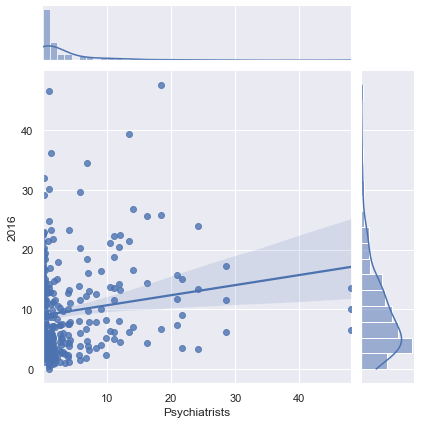

In [32]:
# Psychiatrists per capita vs Suicide Rate in 2016

# Note: Human Resources Data is Sampled at 2016
df_psychiatrists_plot = df_combo[["Psychiatrists", "2016"]].dropna()
my_plot = sns.jointplot(data=df_psychiatrists_plot, x="Psychiatrists", y="2016", kind="reg")

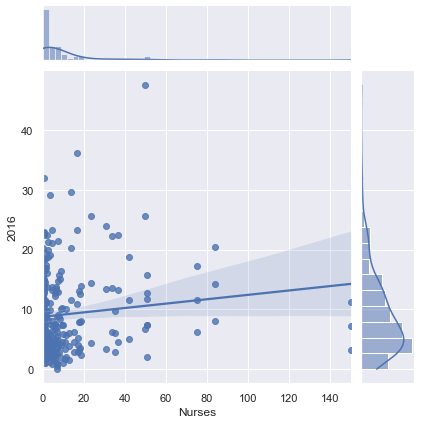

In [41]:
# Nurses per capita vs Suicide Rate in 2016

# Note: Human Resources Data is Sampled at 2016
df_nurses_plot = df_combo[["Nurses", "2016"]].dropna()
my_plot_2 = sns.jointplot(data=df_nurses_plot, x="Nurses", y="2016", kind="reg")

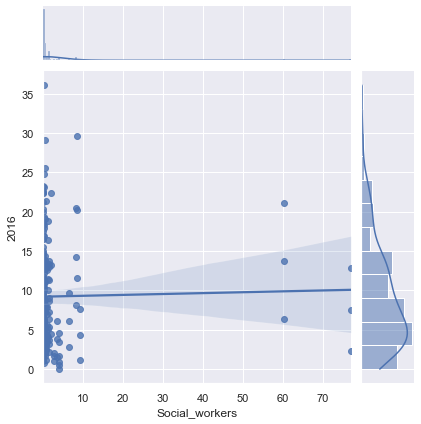

In [40]:
# Social_worker per capita vs Suicide Rate in 2016

# Note: Human Resources Data is Sampled at 2016
df_social_worker_plot = df_combo[["Social_workers", "2016"]].dropna()
my_plot_3 = sns.jointplot(data=df_psychiatrists_plot_3, x="Social_workers", y="2016", kind="reg")

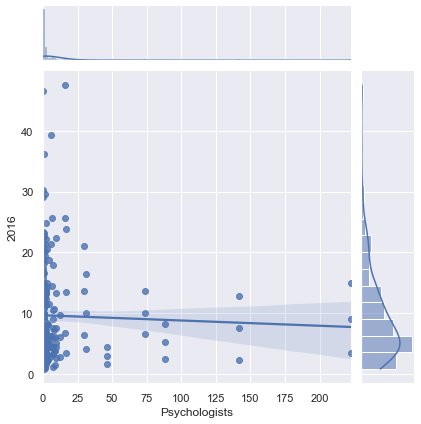

In [50]:
# Psychologists per capita vs Suicide Rate in 2016

# Note: Human Resources Data is Sampled at 2016
df_psychologists = df_combo[["Psychologists", "2016"]].dropna()
my_plot_4 = sns.jointplot(data=df_psychologists, x="Psychologists", y="2016", kind="reg")

As shown in the plots created above, only the number of psychiatrists slightly correlate with the suicide rate in 2016. This can be a result of lack of accurate documentation of suicide incidence and 

Psychiatrists and psychologists are very important for treating mental illness such as depression and raising awareness and advancing public awareness of mental illness, the following steps shows the distribution of number of psychiatrists and psychologists across different countries in different countries.

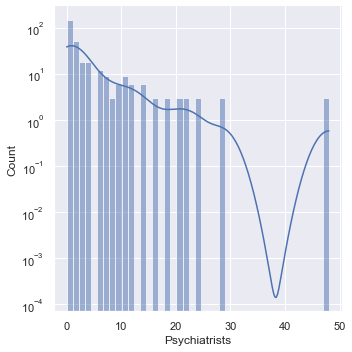

In [60]:
g1 = sns.displot(data=df_psychiatrists_plot, x="Psychiatrists", kde=True, log_scale=(False, True))

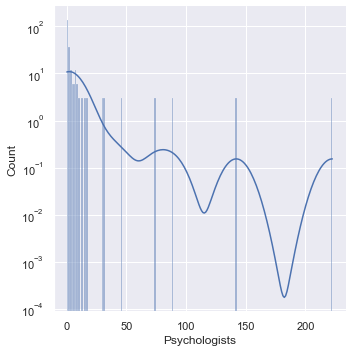

In [61]:
sns.displot(data=df_psychologists, x="Psychologists", kde=True, log_scale=(False, True))

The above visualization shows the skewed distribution of psychiatrists / psychologists per capita. Psychologists are significantly rarer than psychiatrists.